In [18]:
#project

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("crop_recommendation.csv")
print("csv loaded successfully")
#first five value
print(df.head())
print(df.tail())

csv loaded successfully
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
        N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [21]:
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [22]:
print(df.isnull().sum(axis=1))

0       0
1       0
2       0
3       0
4       0
       ..
2195    0
2196    0
2197    0
2198    0
2199    0
Length: 2200, dtype: int64


In [23]:
duplicates=df.duplicated().sum()
print("number of duplicate rows:",duplicates)

number of duplicate rows: 0


In [24]:
if duplicates>0:
    df.drop_duplicates(inplace=True)
    print("Duplicates remove.")
    print("new shape:",df.shape)
else:
    print("No duplicate found,dataset is clean.")

No duplicate found,dataset is clean.


In [25]:
le=LabelEncoder()

In [26]:
df["label_encoded"] =le.fit_transform(df["label"])
print(df[["label","label_encoded"]].head())

  label  label_encoded
0  rice             20
1  rice             20
2  rice             20
3  rice             20
4  rice             20


In [27]:
num_cols= ["N","P","K","temperature","humidity","ph","rainfall"]
scaler=StandardScaler()
df[num_cols]=scaler.fit_transform(df[num_cols])
print("Scaling completed")

Scaling completed


In [28]:
print(df.describe())

                  N             P             K   temperature      humidity  \
count  2.200000e+03  2.200000e+03  2.200000e+03  2.200000e+03  2.200000e+03   
mean  -1.033517e-16  5.167584e-17 -5.167584e-17  3.875688e-16 -1.808654e-16   
std    1.000227e+00  1.000227e+00  1.000227e+00  1.000227e+00  1.000227e+00   
min   -1.369636e+00 -1.466498e+00 -8.521355e-01 -3.316592e+00 -2.570842e+00   
25%   -8.006682e-01 -7.690712e-01 -5.559060e-01 -5.623337e-01 -5.040636e-01   
50%   -3.671690e-01 -7.164472e-02 -3.189225e-01 -3.466729e-03  4.039475e-01   
75%    9.130086e-01  4.438444e-01  1.680429e-02  5.817982e-01  8.296508e-01   
max    2.423483e+00  2.778707e+00  3.097591e+00  3.567190e+00  1.280400e+00   

                 ph      rainfall  label_encoded  
count  2.200000e+03  2.200000e+03    2200.000000  
mean  -1.291896e-16  1.550275e-16      10.500000  
std    1.000227e+00  1.000227e+00       6.345731  
min   -3.831577e+00 -1.515170e+00       0.000000  
25%   -6.433340e-01 -7.081870e-01

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,-1.033517e-16,1.000227,-1.369636,-0.800668,-0.367169,0.913009,2.423483
P,2200.0,5.167584e-17,1.000227,-1.466498,-0.769071,-0.071645,0.443844,2.778707
K,2200.0,-5.167584e-17,1.000227,-0.852136,-0.555906,-0.318922,0.016804,3.097591
temperature,2200.0,3.875688e-16,1.000227,-3.316592,-0.562334,-0.003467,0.581798,3.567190
humidity,2200.0,-1.808654e-16,1.000227,-2.570842,-0.504064,0.403947,0.829651,1.280400
ph,2200.0,-1.291896e-16,1.000227,-3.831577,-0.643334,-0.057427,0.586954,4.478912
rainfall,2200.0,1.550275e-16,1.000227,-1.515170,-0.708187,-0.156445,0.378624,3.550701
label_encoded,2200.0,1.050000e+01,6.345731,0.000000,5.000000,10.500000,16.000000,21.000000


In [31]:
numeric_df=df.select_dtypes(include=["float64","int64"])
corr_matrix=numeric_df.corr()
print(corr_matrix)

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


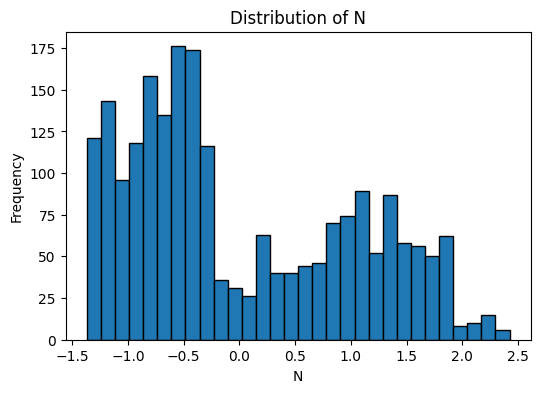

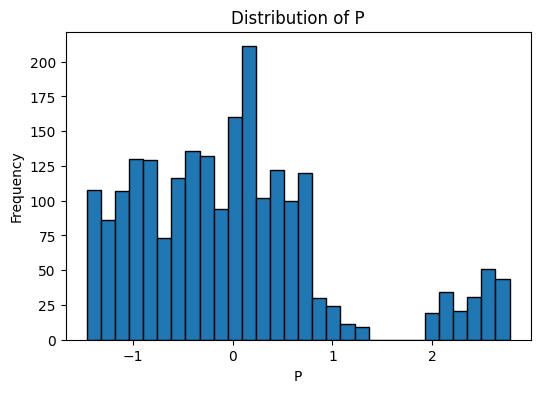

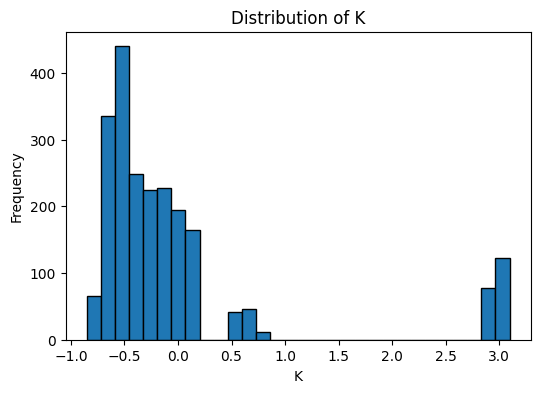

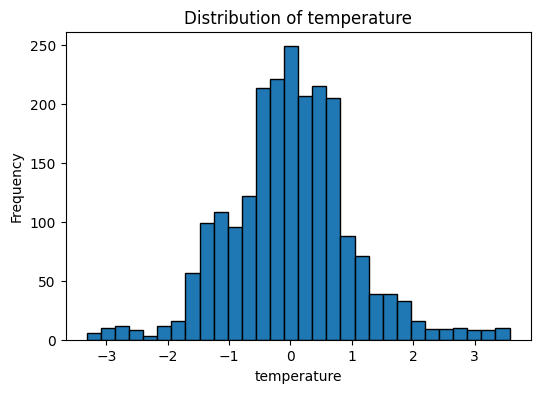

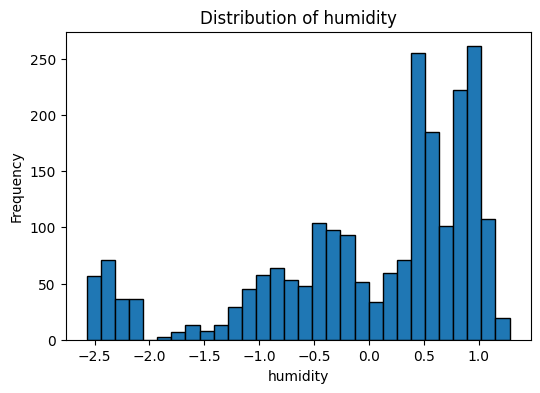

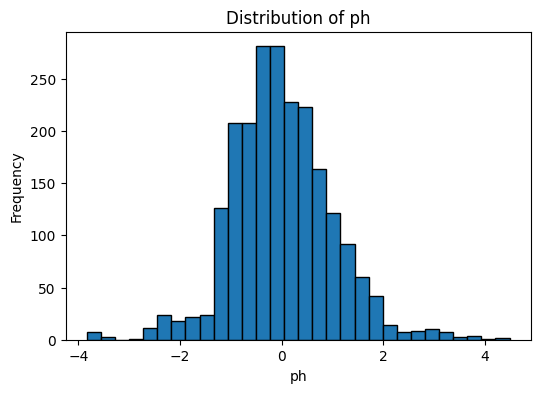

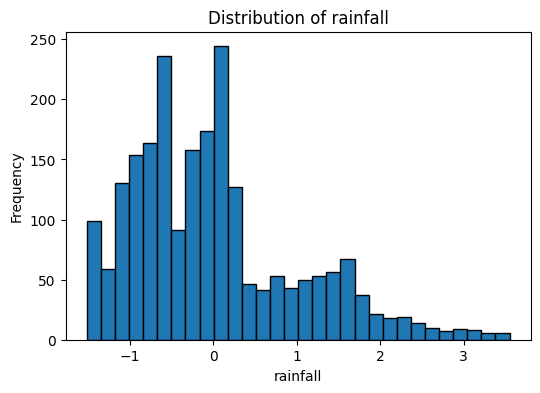

In [32]:
num_cols = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


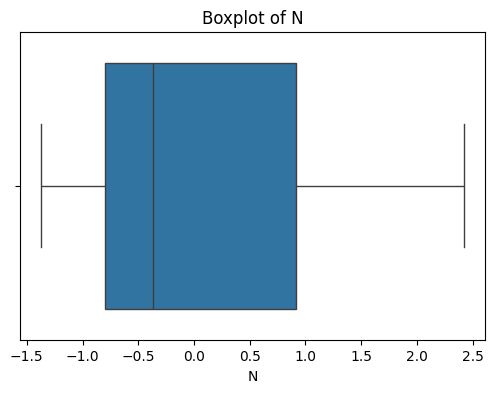

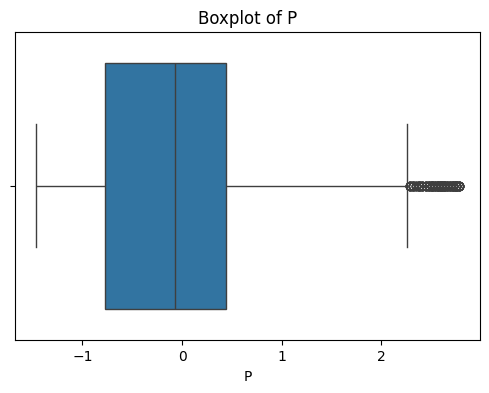

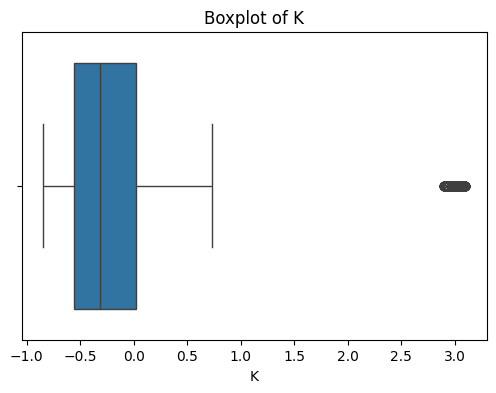

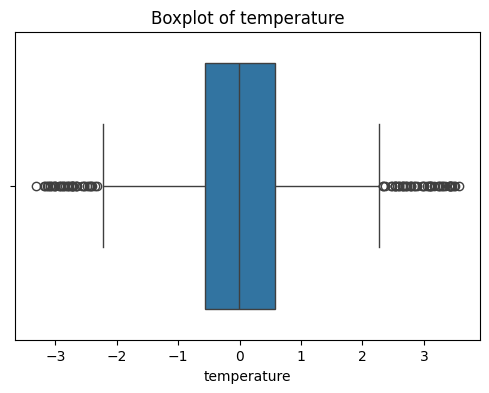

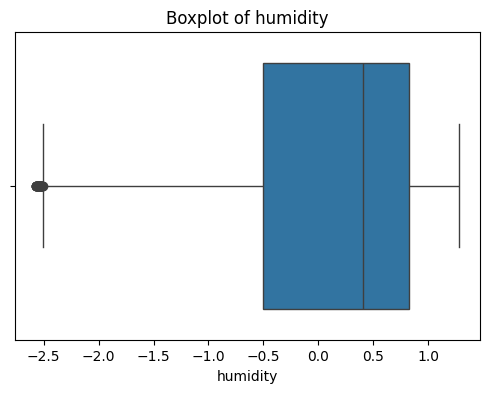

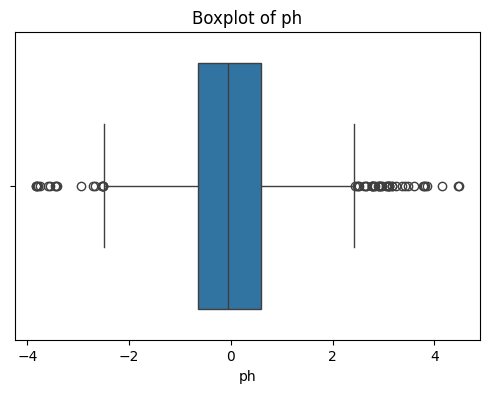

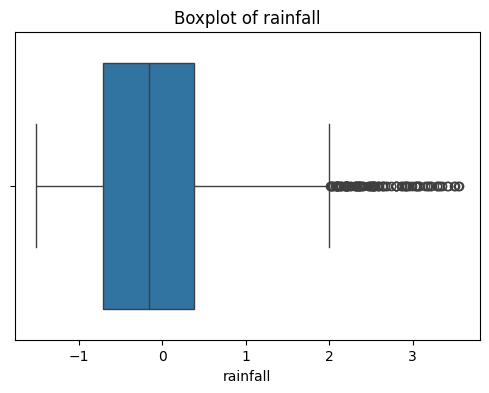

In [33]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


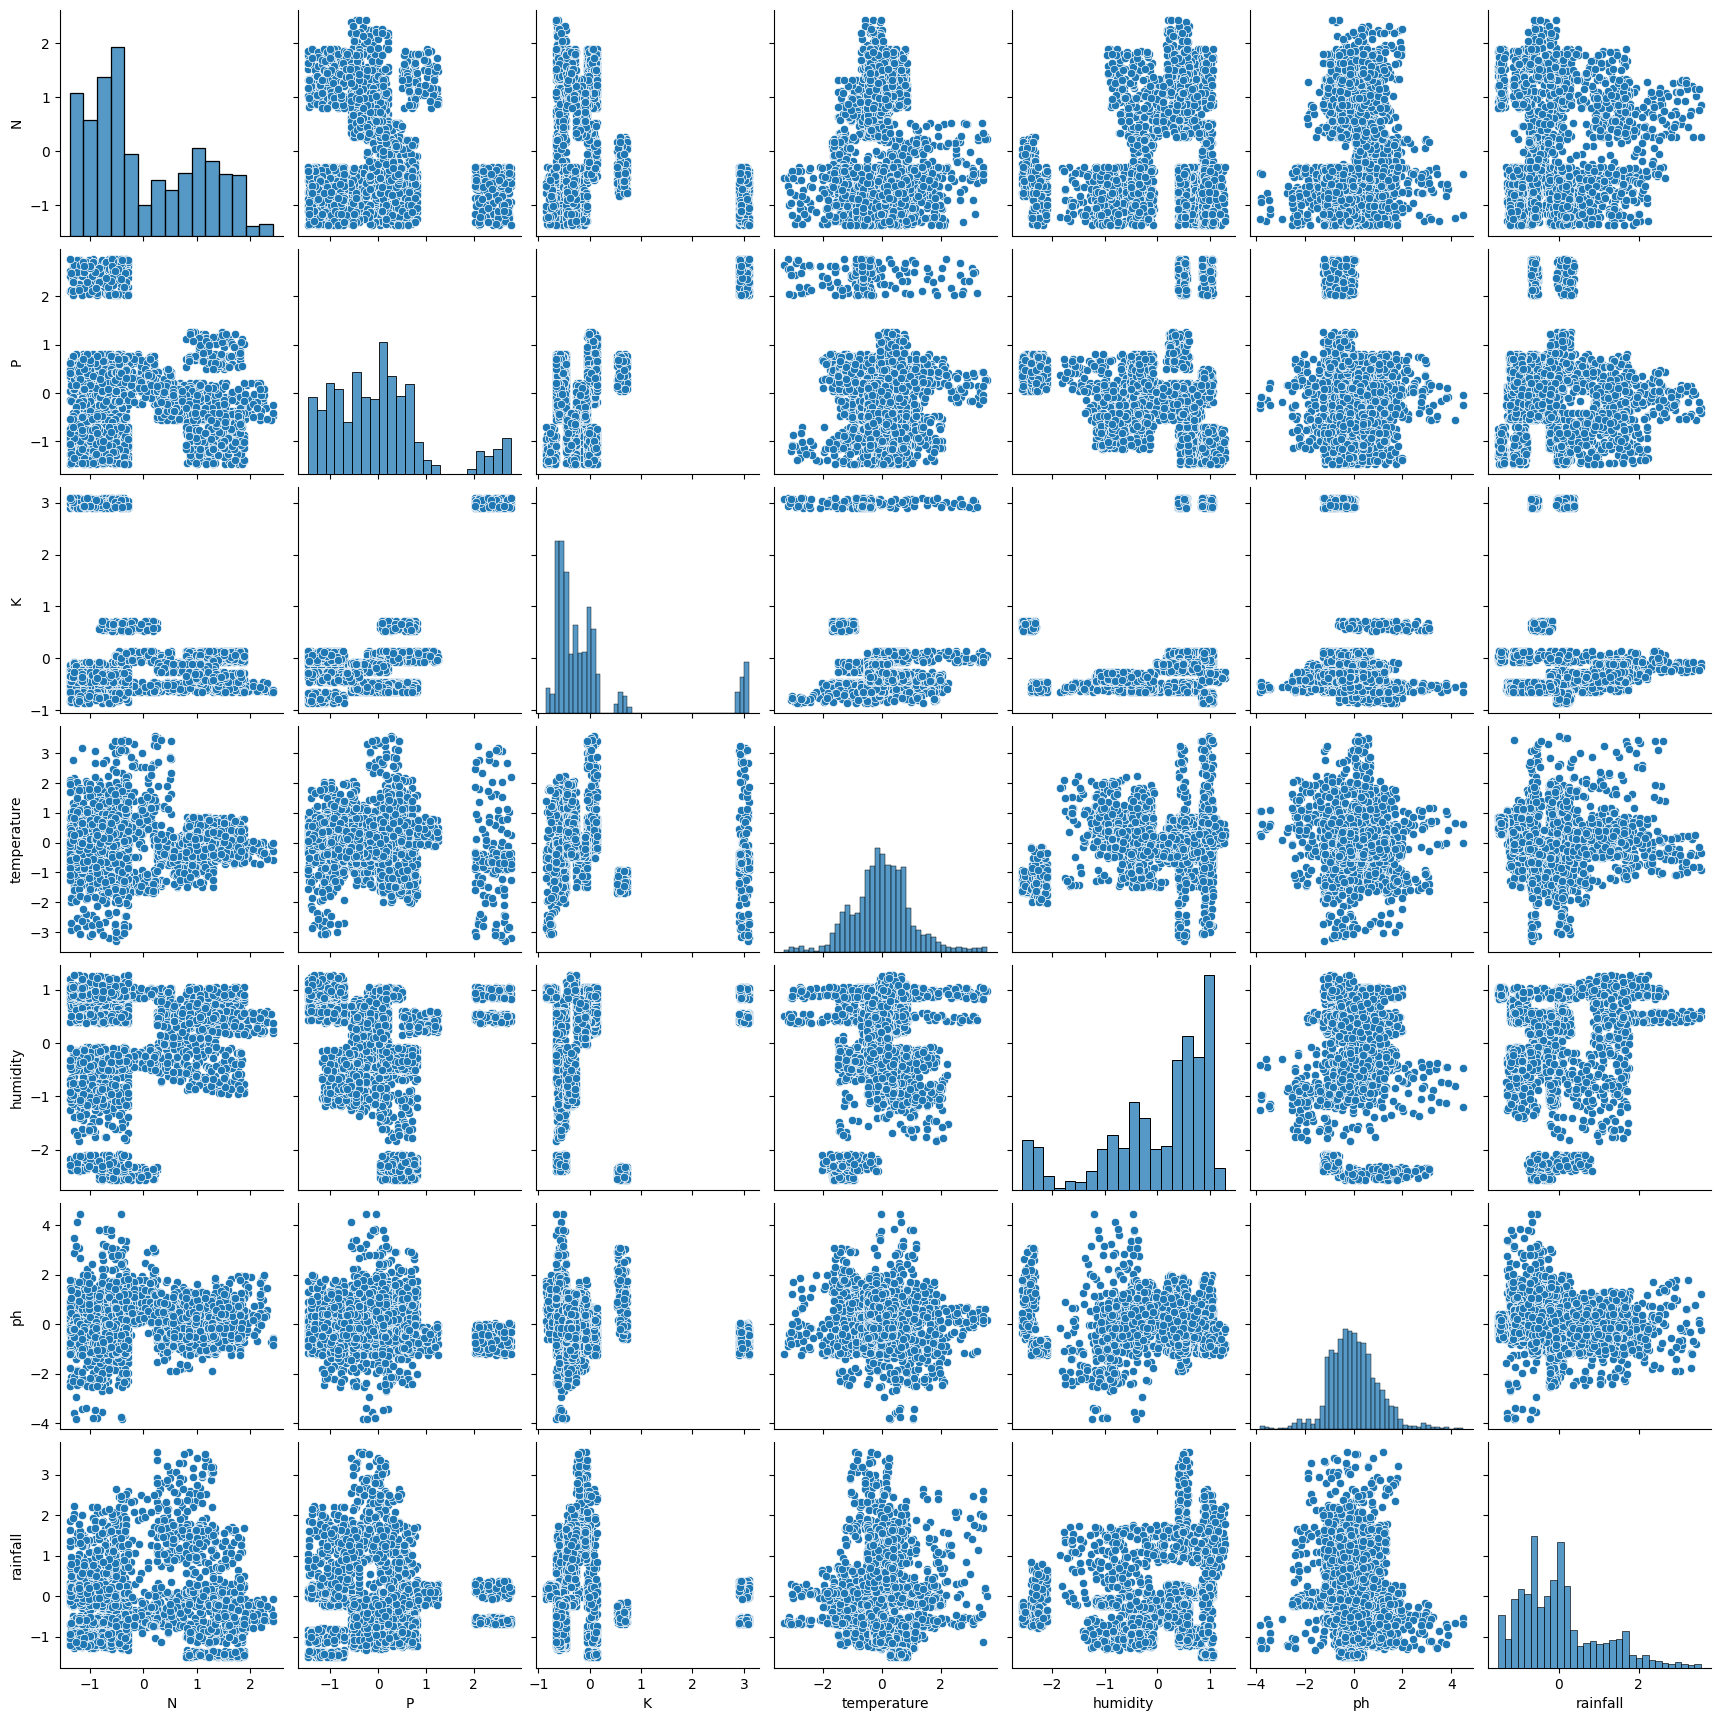

In [34]:
sns.pairplot(df[num_cols])
plt.show()


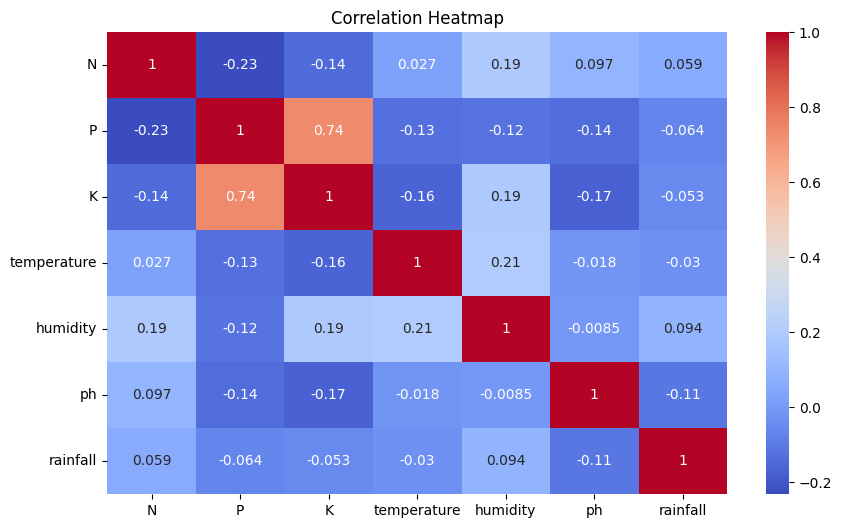

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


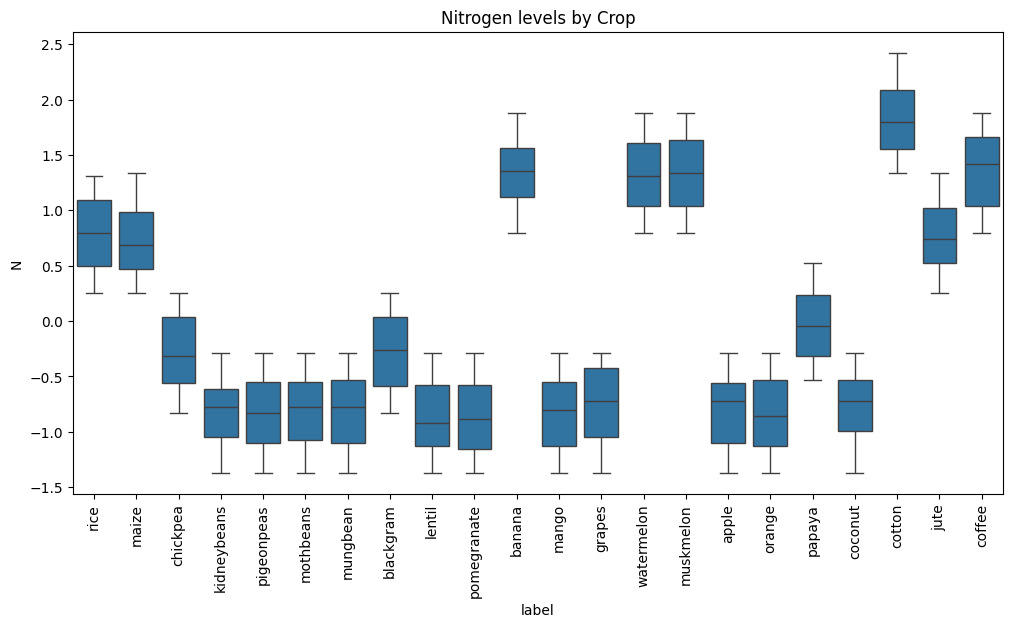

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["label"], y=df["N"])
plt.xticks(rotation=90)
plt.title("Nitrogen levels by Crop")
plt.show()


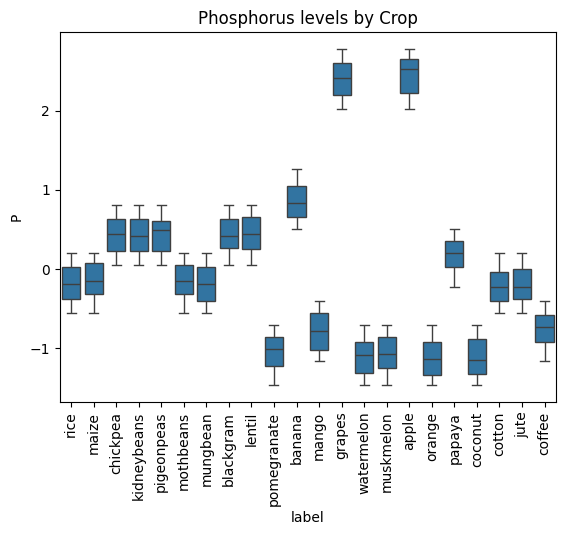

In [37]:
sns.boxplot(x=df["label"], y=df["P"])
plt.xticks(rotation=90)
plt.title("Phosphorus levels by Crop")
plt.show()


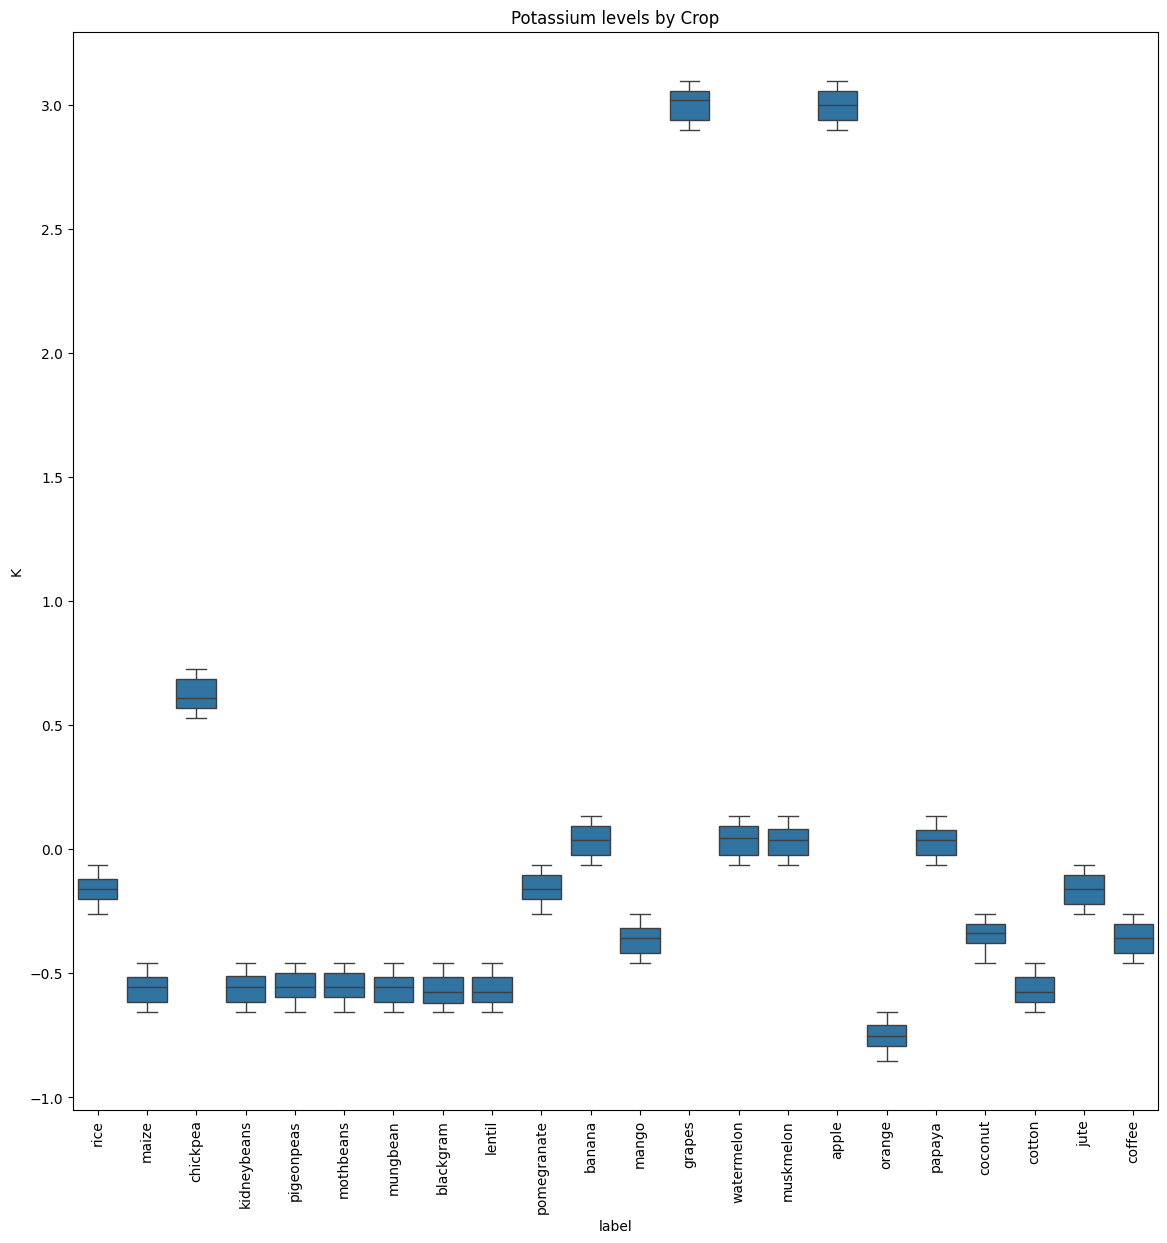

In [38]:
plt.figure(figsize=(14,14))   
sns.boxplot(x=df["label"], y=df["K"])
plt.xticks(rotation=90)
plt.title("Potassium levels by Crop")
plt.show()


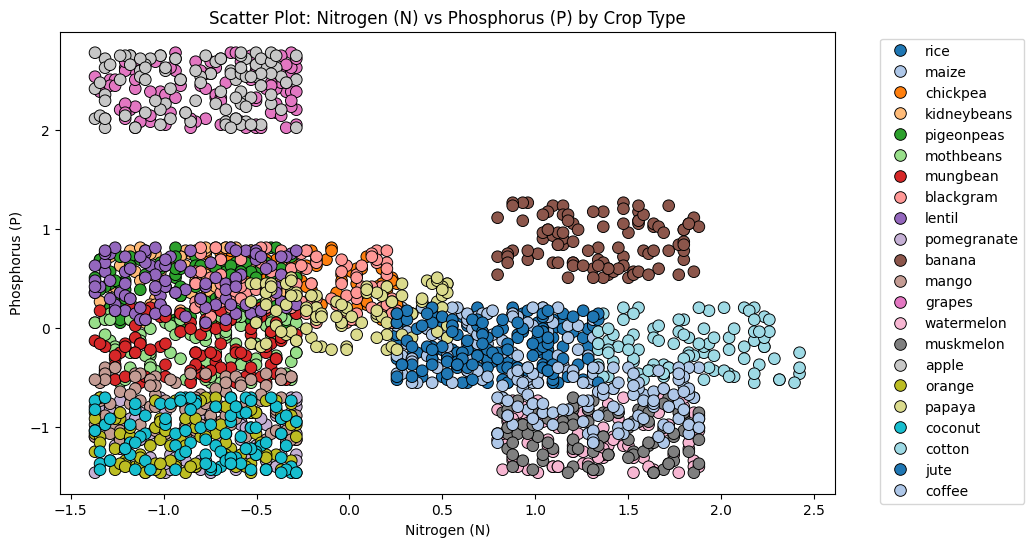

In [39]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x=df["N"], 
    y=df["P"], 
    hue=df["label"],              # color by crop type
    palette="tab20",              # 20 different colors
    s=70,                         # point size
    edgecolor="black"
)

plt.title("Scatter Plot: Nitrogen (N) vs Phosphorus (P) by Crop Type")
plt.xlabel("Nitrogen (N)")
plt.ylabel("Phosphorus (P)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside
plt.show()



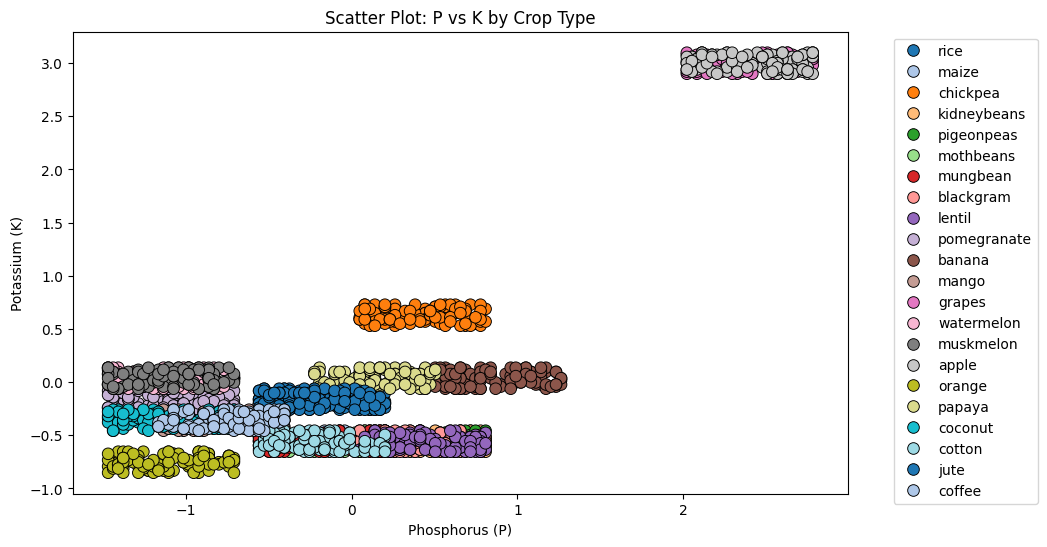

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["P"], y=df["K"], hue=df["label"], palette="tab20", s=70, edgecolor="black")
plt.title("Scatter Plot: P vs K by Crop Type")
plt.xlabel("Phosphorus (P)")
plt.ylabel("Potassium (K)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


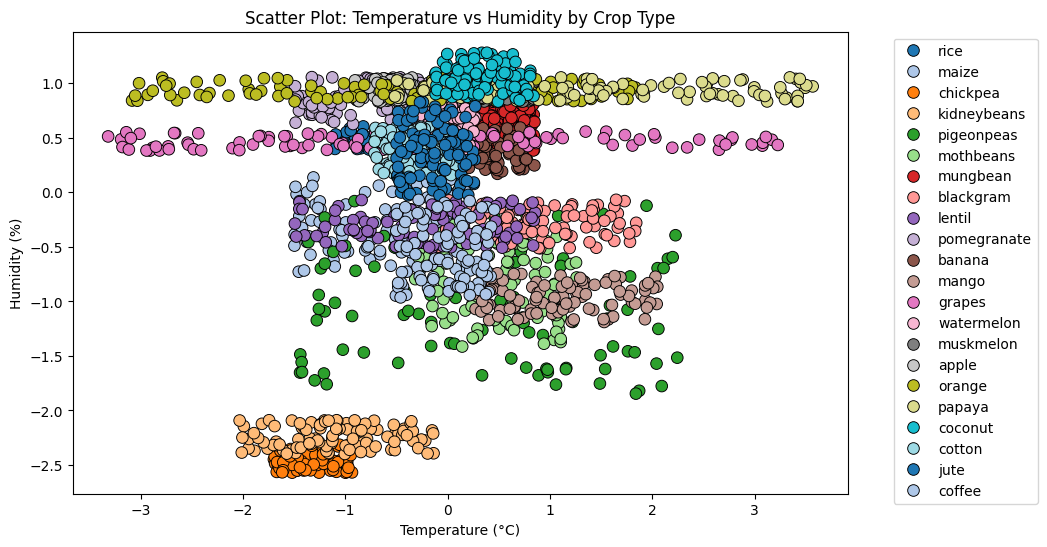

In [41]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x=df["temperature"], 
    y=df["humidity"], 
    hue=df["label"], 
    palette="tab20",
    s=70,
    edgecolor="black"
)

plt.title("Scatter Plot: Temperature vs Humidity by Crop Type")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


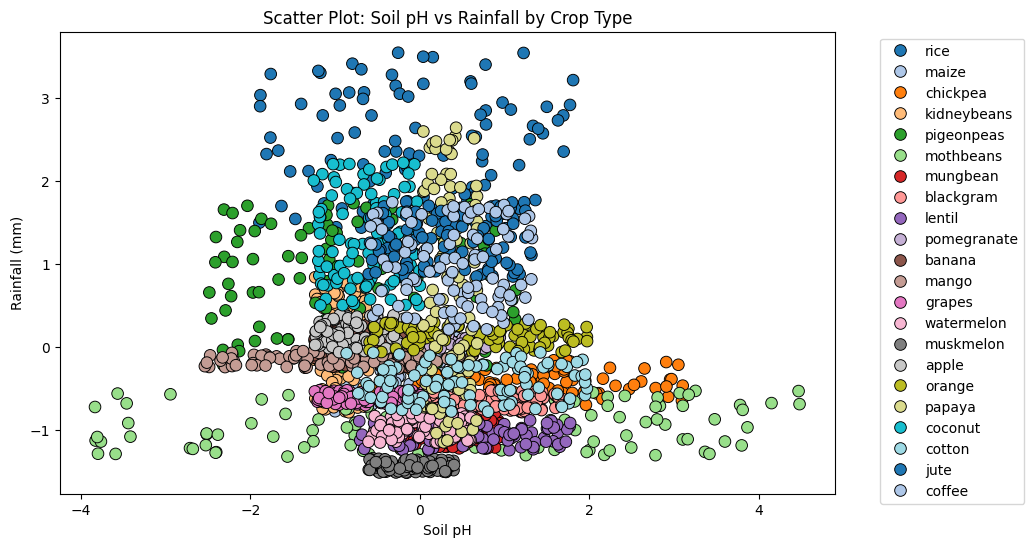

In [43]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x=df["ph"], 
    y=df["rainfall"], 
    hue=df["label"], 
    palette="tab20",
    s=70,
    edgecolor="black"
)

plt.title("Scatter Plot: Soil pH vs Rainfall by Crop Type")
plt.xlabel("Soil pH")
plt.ylabel("Rainfall (mm)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [44]:
from sklearn.model_selection import train_test_split

X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)






Test Accuracy: 0.9954545454545455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00    

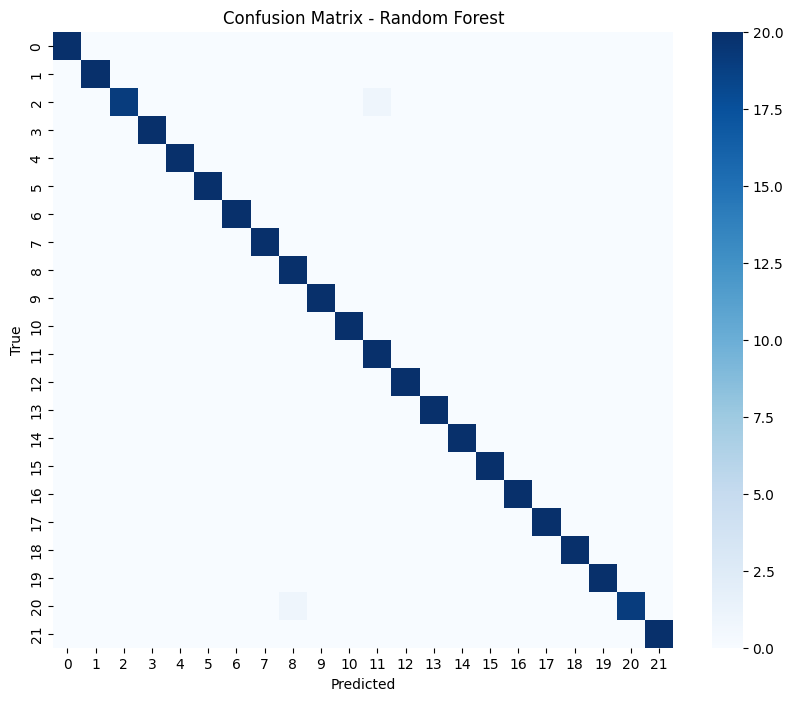

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [46]:
true_labels = le.inverse_transform(y_test)
pred_labels = le.inverse_transform(y_pred)

for i in range(10):
    print(f"True: {true_labels[i]}, Predicted: {pred_labels[i]}")


True: orange, Predicted: orange
True: banana, Predicted: banana
True: cotton, Predicted: cotton
True: maize, Predicted: maize
True: orange, Predicted: orange
True: chickpea, Predicted: chickpea
True: rice, Predicted: rice
True: blackgram, Predicted: blackgram
True: banana, Predicted: banana
True: orange, Predicted: orange
